# **Student** **Performance**


### <b>Mounting to Google Drive</b>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### <b>Importing Libraries</b>

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle/Student_Reg/Student_Performance.csv')

In [4]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


### <b>Exploratory Data Analysis and Data Cleaning</b>

In [5]:
data.shape

(10000, 6)

In [6]:
data.duplicated().sum()

127

In [7]:
#dropping duplicates
data.drop_duplicates(inplace=True)

In [8]:
data.shape

(9873, 6)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9873 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     9873 non-null   int64  
 1   Previous Scores                   9873 non-null   int64  
 2   Extracurricular Activities        9873 non-null   object 
 3   Sleep Hours                       9873 non-null   int64  
 4   Sample Question Papers Practiced  9873 non-null   int64  
 5   Performance Index                 9873 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 539.9+ KB


In [10]:
data['Extracurricular Activities'] = data['Extracurricular Activities'].astype('category')

In [11]:
data.dtypes

Hours Studied                          int64
Previous Scores                        int64
Extracurricular Activities          category
Sleep Hours                            int64
Sample Question Papers Practiced       int64
Performance Index                    float64
dtype: object

In [12]:
#total no. of null values in each column
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [13]:
data.describe().round(2)

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,9873.00,9873.00,9873.00,9873.00,9873.00
mean,4.99,69.44,6.53,4.58,55.22
std,2.59,17.33,1.70,2.87,19.21
min,1.00,40.00,4.00,0.00,10.00
25%,3.00,54.00,5.00,2.00,40.00
50%,5.00,69.00,7.00,5.00,55.00
75%,7.00,85.00,8.00,7.00,70.00
max,9.00,99.00,9.00,9.00,100.00


In [14]:
data['Extracurricular Activities'].describe()

count     9873
unique       2
top         No
freq      4986
Name: Extracurricular Activities, dtype: object

### <b>Data Visualization</b>

<Axes: >

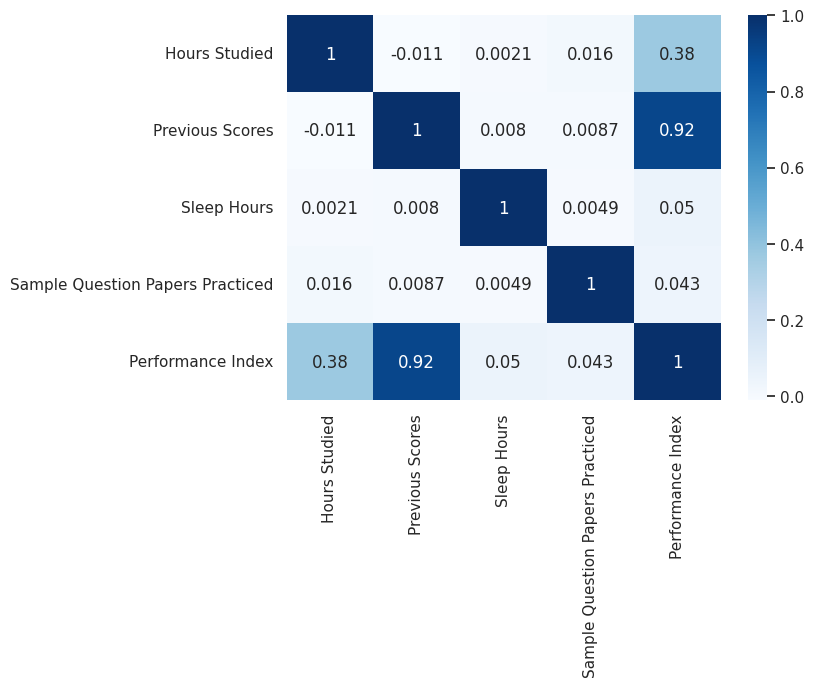

In [15]:
import seaborn as sb
sb.set(rc = {'figure.figsize':(7,5)})
sb.heatmap(data.corr(), cmap="Blues", annot=True)

High correlation of 'Previous Scores' with target can be a valuable insight. It can serve as strong predictors, leading to more accurate predictions.
<br>
Clearly, is a positive correlation.

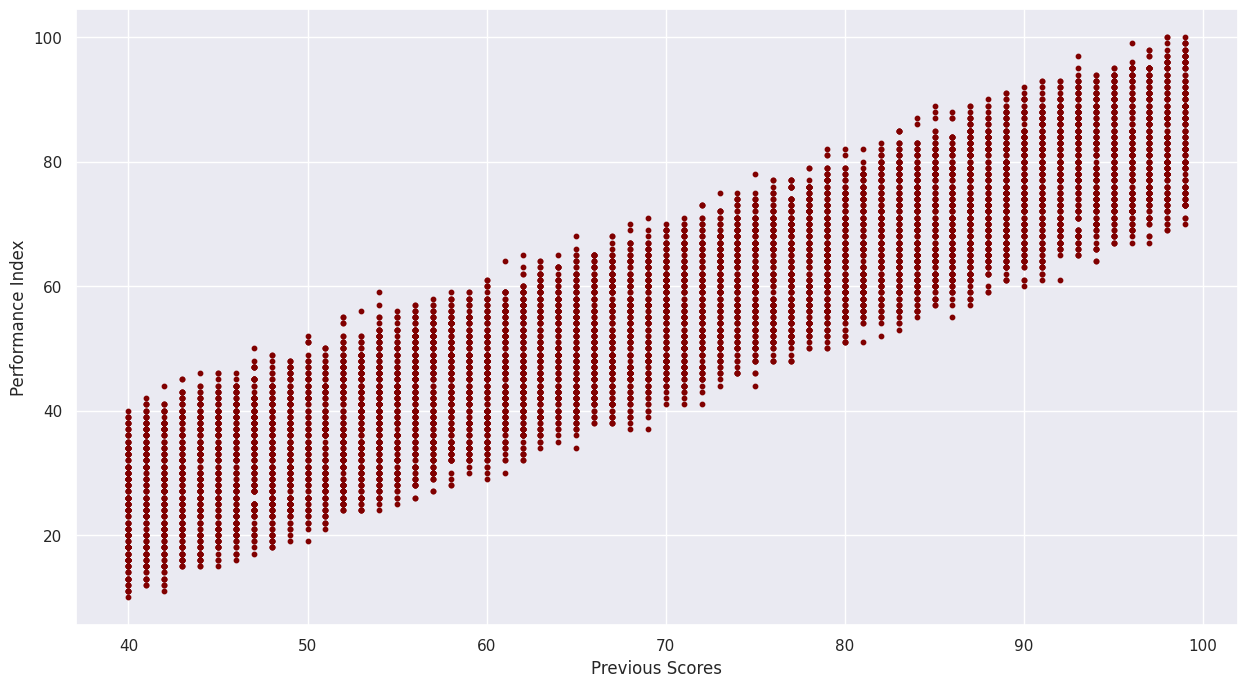

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.scatter(y = data['Performance Index'], x = data['Previous Scores'], color='maroon', s=10)
plt.ylabel("Performance Index")
plt.xlabel("Previous Scores")
plt.show()

### <b>Splitting the Data into Train and Validation</b>

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x = data.drop('Performance Index', axis=1)
y = data['Performance Index']

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.30, random_state = 24)

In [19]:
print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(6911, 5)
(2962, 5)
(6911,)
(2962,)


In [20]:
numeric_list = x_train.select_dtypes(include = ['int64', 'float64']).columns
categoric_list = x_train.select_dtypes(include = ['category']).columns

### <b>Scaling the Numeric Data - Standard Scaler</b>

In [21]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [22]:
scaler = StandardScaler()

In [23]:
scaler.fit(x_train[numeric_list])

StandardScaler()

In [24]:
scaled_train = pd.DataFrame(scaler.transform(x_train[numeric_list]), columns = numeric_list)
scaled_valid = pd.DataFrame(scaler.transform(x_valid[numeric_list]), columns = numeric_list)

In [25]:
print(scaled_train.shape)
print(scaled_valid.shape)

(6911, 4)
(2962, 4)


In [26]:
scaled_train.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
0,-1.162068,-0.375140,-0.326153,-1.594232
1,1.536797,1.701517,0.261756,0.142869
2,-0.390964,1.528462,0.261756,0.837709
3,-0.390964,0.201709,0.261756,-1.594232
4,0.380141,-0.548195,-0.326153,-0.551971


### <b>Encoding the Categoric Data - One Hot Encoder</b>

In [27]:
ohe = OneHotEncoder(handle_unknown = 'ignore')

In [28]:
ohe.fit(x_train[categoric_list])

OneHotEncoder(handle_unknown='ignore')

In [29]:
ohe_train = pd.DataFrame(ohe.transform(x_train[categoric_list]).toarray() , columns = ohe.get_feature_names_out())
ohe_valid = pd.DataFrame(ohe.transform(x_valid[categoric_list]).toarray() , columns = ohe.get_feature_names_out())

In [30]:
print(ohe_train.shape)
print(ohe_valid.shape)

(6911, 2)
(2962, 2)


In [31]:
x_train = pd.concat([scaled_train, ohe_train], axis = 1)
x_train.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extracurricular Activities_No,Extracurricular Activities_Yes
0,-1.162068,-0.375140,-0.326153,-1.594232,1.0,0.0
1,1.536797,1.701517,0.261756,0.142869,0.0,1.0
2,-0.390964,1.528462,0.261756,0.837709,0.0,1.0
3,-0.390964,0.201709,0.261756,-1.594232,0.0,1.0
4,0.380141,-0.548195,-0.326153,-0.551971,1.0,0.0


In [32]:
x_valid = pd.concat([scaled_valid, ohe_valid], axis = 1)
x_valid.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extracurricular Activities_No,Extracurricular Activities_Yes
0,1.536797,-0.259770,0.849664,0.837709,1.0,0.0
1,-0.005411,0.778559,0.261756,0.490289,1.0,0.0
2,-0.005411,-1.413468,-0.326153,-1.594232,1.0,0.0
3,0.380141,-1.471153,0.261756,0.837709,0.0,1.0
4,0.765693,1.066983,0.261756,0.142869,0.0,1.0


***

## <b>Model Building</b>
### <b>Importing and Defining Evaluation Metrics</b>


In [33]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [34]:
scores = pd.DataFrame(columns = ['Model','MAE_Train','MSE_Train','RMSE_Train','MAE_Valid','MSE_Valid','RMSE_Valid','R^2'])



def get_metrics(train_actual, train_predicted, valid_actual, valid_predicted, model_description, dataframe):

    MAE_Train = metrics.mean_absolute_error(train_actual, train_predicted)
    MSE_Train = metrics.mean_squared_error(train_actual, train_predicted)
    RMSE_Train = np.sqrt(metrics.mean_squared_error(train_actual, train_predicted))

    MAE_Valid = metrics.mean_absolute_error(valid_actual, valid_predicted)
    MSE_Valid = metrics.mean_squared_error(valid_actual, valid_predicted)
    RMSE_Valid = np.sqrt(metrics.mean_squared_error(valid_actual, valid_predicted))

    r2 = metrics.r2_score(valid_actual, valid_predicted)

    m1 = pd.Series([model_description, MAE_Train, MSE_Train, RMSE_Train, MAE_Valid, MSE_Valid, RMSE_Valid, r2],
                                           index = scores.columns)

    dataframe = dataframe.append(m1, ignore_index=True)
    return(dataframe)

### <b>Linear Regression</b>


In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
LR = LinearRegression()

In [38]:
LR.fit(x_train, y_train)

LinearRegression()

In [39]:
lr_pred_train = LR.predict(x_train)
lr_pred_valid = LR.predict(x_valid)

In [40]:
print('R-square for Train : ', LR.score(x_train, y_train))
print('R-square for Validation : ', LR.score(x_valid, y_valid))

R-square for Train :  0.9888956886050718
R-square for Validation :  0.9881715209672108


In [41]:
scores = get_metrics(y_train, lr_pred_train, y_valid, lr_pred_valid, "Linear Regression", scores)
scores

,Model,MAE_Train,MSE_Train,RMSE_Train,MAE_Valid,MSE_Valid,RMSE_Valid,R^2
0,Linear Regression,1.608322,4.097006,2.024106,1.658343,4.361527,2.088427,0.988172


### <b>Decision Tree Regressor</b>


In [42]:
from sklearn.tree import DecisionTreeRegressor

In [43]:
dt = DecisionTreeRegressor()

In [44]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [45]:
dt_pred_train = dt.predict(x_train)
dt_pred_valid = dt.predict(x_valid)

In [46]:
print('R-square for Train : ', dt.score(x_train, y_train))
print('R-square for Validation : ', dt.score(x_valid, y_valid))

R-square for Train :  0.9994554597349106
R-square for Validation :  0.9747297227582046


In [47]:
scores = get_metrics(y_train, dt_pred_train, y_valid, dt_pred_valid, "Decision Tree ", scores)
scores

,Model,MAE_Train,MSE_Train,RMSE_Train,MAE_Valid,MSE_Valid,RMSE_Valid,R^2
0,Linear Regression,1.608322,4.097006,2.024106,1.658343,4.361527,2.088427,0.988172
1,Decision Tree,0.116867,0.200912,0.448232,2.410083,9.317935,3.052529,0.974730


### <b>Visualizing the Tree</b>


In [ ]:
from sklearn.tree import export_graphviz
import graphviz

# Visualize the Decision Tree
dot_data = export_graphviz(dt, out_file=None, feature_names=x_train.columns,
                           filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # This will save a PDF file named "decision_tree.pdf"
graph.view()

'decision_tree.pdf'

### <b>Fine-Tuning Decision Tree - Grid Search</b>

In [48]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for grid search
param_grid = {
    'max_depth': [None, 3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV with the DecisionTreeRegressor and parameter grid
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the grid search to the training data
grid_search.fit(x_train, y_train)

# Get the best parameters and best MSE score
best_params = grid_search.best_params_
best_mse = -grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best MSE using grid search: {best_mse}")


Best parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best MSE using grid search: 6.408130177586493


In [49]:
improved_regressor = DecisionTreeRegressor(max_depth=None, min_samples_split=10, min_samples_leaf=4, random_state=142)

# Fit the improved model to the training data
improved_regressor.fit(x_train, y_train)

# Make predictions on the test data using the improved model
y_act_improved = improved_regressor.predict(x_train)
y_pred_improved = improved_regressor.predict(x_valid)

In [50]:
print('R-square for Train : ', improved_regressor.score(x_train, y_train))
print('R-square for Validation : ', improved_regressor.score(x_valid, y_valid))

R-square for Train :  0.9920206054594727
R-square for Validation :  0.9819198919519301


In [51]:
scores = get_metrics(y_train, y_act_improved, y_valid, y_pred_improved, "GridSearchCV", scores)
scores

,Model,MAE_Train,MSE_Train,RMSE_Train,MAE_Valid,MSE_Valid,RMSE_Valid,R^2
0,Linear Regression,1.608322,4.097006,2.024106,1.658343,4.361527,2.088427,0.988172
1,Decision Tree,0.116867,0.200912,0.448232,2.410083,9.317935,3.052529,0.974730
2,GridSearchCV,1.353577,2.944048,1.715823,2.054268,6.666696,2.581995,0.981920


<b>Linear regression model is the best fit for this data.</b>
### <b>Thank You!</b>
